#### Basic imports

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

#### Importing data
Global COVID data could be accessed [here](https://ourworldindata.org/coronavirus-source-data)

In [4]:
global_covid = pd.read_csv("C://Users/ovidi/OneDrive/Desktop/Turing college/DS 1.2.4/covid-data.csv")

In [5]:
global_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,ZWE,Africa,Zimbabwe,2020-12-21,12422.0,97.0,152.000,322.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56269,ZWE,Africa,Zimbabwe,2020-12-22,12544.0,122.0,146.000,326.0,4.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56270,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56271,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


#### Extract Lithuanian data

In [7]:
lithuania_covid = global_covid[global_covid["location"]=="Lithuania"]

In [8]:
lithuania_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 29644 to 29946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            303 non-null    object 
 1   continent                           303 non-null    object 
 2   location                            303 non-null    object 
 3   date                                303 non-null    object 
 4   total_cases                         302 non-null    float64
 5   new_cases                           302 non-null    float64
 6   new_cases_smoothed                  297 non-null    float64
 7   total_deaths                        280 non-null    float64
 8   new_deaths                          280 non-null    float64
 9   new_deaths_smoothed                 297 non-null    float64
 10  total_cases_per_million             302 non-null    float64
 11  new_cases_per_million               302

#### Extracting relevant columns

In [10]:
relevant_cols = ["location", "date", "total_cases", "total_deaths", "new_cases", "new_deaths"]

In [62]:
lithuania_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 29644 to 29946
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   location      303 non-null    object        
 1   date          303 non-null    datetime64[ns]
 2   total_cases   302 non-null    float64       
 3   total_deaths  280 non-null    float64       
 4   new_cases     302 non-null    float64       
 5   new_deaths    280 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 16.6+ KB


#### Fixing date column to datetime

In [39]:
lithuania_covid["date"] = pd.to_datetime(lithuania_covid["date"])

In [12]:
lithuania_covid

,location,date,total_cases,total_deaths,new_cases,new_deaths
29644,Lithuania,2020-02-23,NaN,NaN,NaN,NaN
29645,Lithuania,2020-02-28,1.0,NaN,1.0,NaN
29646,Lithuania,2020-02-29,1.0,NaN,0.0,NaN
29647,Lithuania,2020-03-01,1.0,NaN,0.0,NaN
29648,Lithuania,2020-03-02,1.0,NaN,0.0,NaN
...,...,...,...,...,...,...
29942,Lithuania,2020-12-21,114487.0,1039.0,2128.0,20.0
29943,Lithuania,2020-12-22,116358.0,1093.0,1871.0,54.0
29944,Lithuania,2020-12-23,120094.0,1143.0,3736.0,50.0
29945,Lithuania,2020-12-24,123889.0,1186.0,3795.0,43.0


#### Ploting two lines (new_cases and new_deaths) distributed in time
Two different Y axis have its own values

Adding vertical lines which represent the start of the first and the second national quarantine

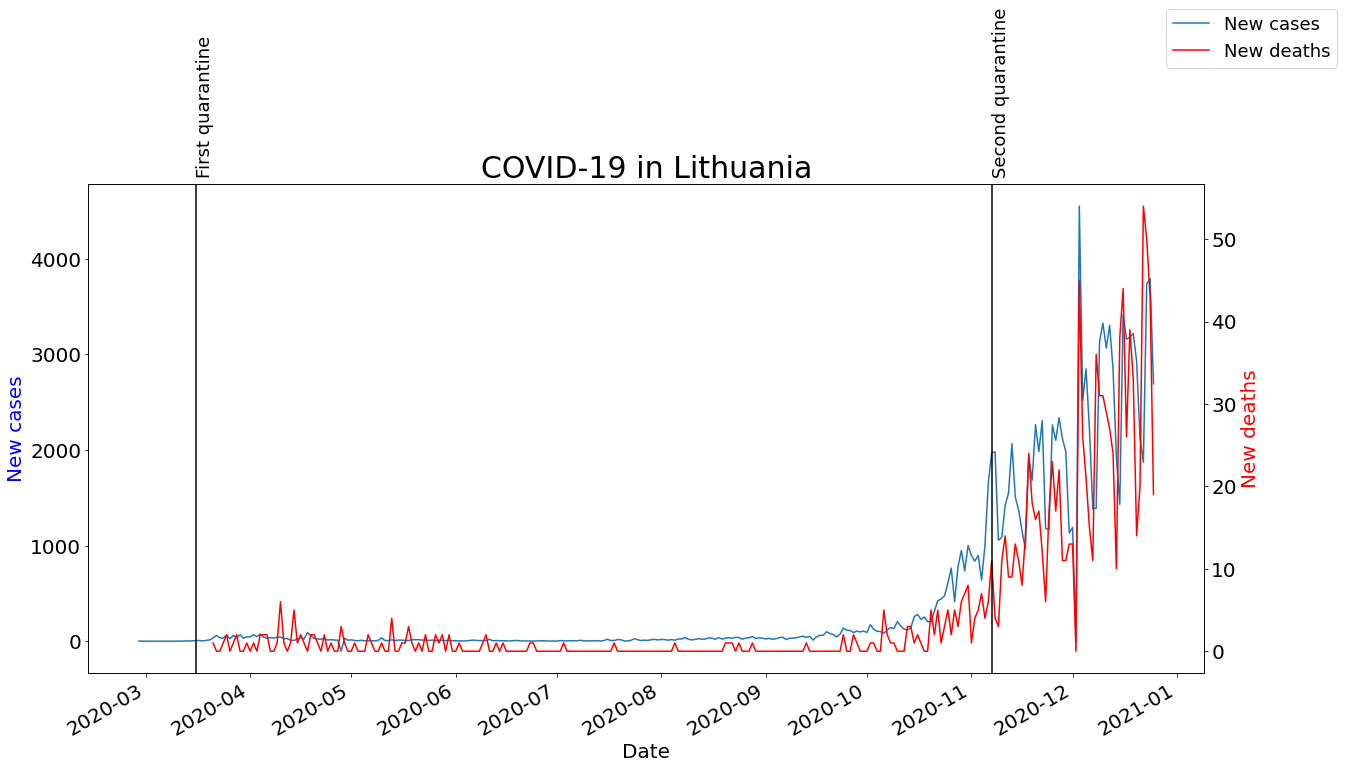

In [77]:
ax = lithuania_covid.plot(x="date", y="new_cases", legend=False)
ax2 = ax.twinx()
lithuania_covid.plot(x="date", y="new_deaths", ax=ax2, legend=False, color="r", figsize=(20,10))
ax.figure.legend(["New cases", "New deaths"], fontsize = 18);
ax.set_xlabel('Date', size=20)
ax.set_ylabel('New cases', color='b', size = 20)
ax2.set_ylabel('New deaths', color='r', size = 20)
plt.title("COVID-19 in Lithuania", size = 30)

plt.axvline(x=pd.to_datetime("2020-03-16"), color = "black")
plt.text(pd.to_datetime("2020-03-16"),58,'First quarantine',rotation=90)
plt.axvline(x=pd.to_datetime("2020-11-07"), color = "black")
plt.text(pd.to_datetime("2020-11-07"),58,'Second quarantine',rotation=90)

plt.rc('font', size=18) 
plt.rc('axes', titlesize=18)     
plt.rc('axes', labelsize=18)    
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=12)    
plt.rc('figure', titlesize=25)

months = mdates.MonthLocator()
ax.format_xdata = mdates.DateFormatter(months)

plt.show()

#### Results
1. First quarantine was on time and it fullfilled the most important goal to prevent disease from spreading.
2. The second quarantine was two months after the relevant prevention time.
3. When the second quarantine was announced, it was not effective in terms of new cases and deaths (might be different reasons: too liberal restrictions, collective unconsciousness, lack of political will, etc).